# Projet AlgoDS : école CentraleSupelec 2021-2022

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

Here the aim is to study the inout csv which nothing else than the input.csv file and output.csv file merged. Here we would like to explore the dataset and discover pattern in this timeseries. Whereas the ENS challenge was about timeseries classification, here we would like to do time series forecasting knowing the class of the time series. In other words, we have to predict the comsumption at d+2 knowing the consumer. 

# Modules and stuffs

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# Data exploration

## Dataset $\mathcal{D}$ in short

In [3]:
df = pd.read_csv("../dataset/inout.csv")

In [4]:
print(df.shape)
print(df.describe())

(70128, 33)
                IDS          Mois  Injection RTE (W)  Refoulement RTE (W)  \
count  70128.000000  70128.000000       7.012800e+04         7.012800e+04   
mean   36311.645791      6.523728       3.903467e+10         1.016443e+09   
std    22613.359627      3.448722       9.854703e+09         8.505473e+08   
min        1.000000      1.000000       1.951452e+10         3.570200e+07   
25%    17532.750000      4.000000       3.175362e+10         4.212288e+08   
50%    35064.500000      7.000000       3.736196e+10         7.282295e+08   
75%    52596.250000     10.000000       4.568327e+10         1.330693e+09   
max    87648.000000     12.000000       7.428889e+10         6.377620e+09   

       Pertes modélisées (W)  Consommations totale (W)  \
count           7.012800e+04              7.012800e+04   
mean            2.710008e+09              3.936041e+10   
std             8.737662e+08              9.679018e+09   
min             1.202823e+09              1.974821e+10   
25% 

In [5]:
print(df.columns)

Index(['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'Injection RTE (W)',
       'Refoulement RTE (W)', 'Pertes modélisées (W)',
       'Consommations totale (W)',
       'Consommation HTA télérelevée à courbe de charge (W)',
       'Consommation totale profilée (W)', 'Consommation HTA profilée (W)',
       'Consommation PME-PMI profilée (W)',
       'Consommation professionnelle profilée (W)',
       'Consommation résidentielle profilée (W)',
       'Production décentralisée totale (W)',
       'Production décentralisée télérelevée à courbe de charge (W)',
       'Production décentralisée profilée (W)',
       'Production photovoltaïque profilée (W)',
       'Production autre profilée (W)',
       'Température réalisée lissée (°Celcius)',
       'Température normale lissée (°Celcius)',
       'Production éolienne totale (W)',
       'Production photovoltaïque totale (W)', 'Pseudo rayonnement',
       'Consommation HTA totale (W)', 'Soutirage net vers autres GRD (W)',
       'RES1_BASE', 

In [6]:
print(df.info(memory_usage='deep'))## dis le vrai usage de mémoire du df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   IDS                                                          70128 non-null  int64  
 1   Horodate_UTC                                                 70128 non-null  object 
 2   Horodate                                                     70128 non-null  object 
 3   Mois                                                         70128 non-null  int64  
 4   Injection RTE (W)                                            70128 non-null  int64  
 5   Refoulement RTE (W)                                          70128 non-null  int64  
 6   Pertes modélisées (W)                                        70128 non-null  int64  
 7   Consommations totale (W)                                     70128 non-null 

In [7]:
print(df.memory_usage(deep=True))## stockage par série

Index                                                              128
IDS                                                             561024
Horodate_UTC                                                   5119344
Horodate                                                       5750496
Mois                                                            561024
Injection RTE (W)                                               561024
Refoulement RTE (W)                                             561024
Pertes modélisées (W)                                           561024
Consommations totale (W)                                        561024
Consommation HTA télérelevée à courbe de charge (W)             561024
Consommation totale profilée (W)                                561024
Consommation HTA profilée (W)                                   561024
Consommation PME-PMI profilée (W)                               561024
Consommation professionnelle profilée (W)                       561024
Consom

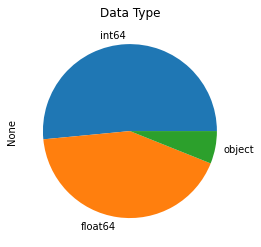

In [8]:
plt.title("Data Type")
df.dtypes.value_counts().plot.pie()# petit camenbert des différents type du dataframe
plt.show()

In [22]:
print((100*df.isna().sum()/df.shape[0]).sort_values(ascending=False))# voir le pourcentage de données manqauntes

Pseudo rayonnement                                             85.905772
PRO2_HP                                                        76.251996
PRO2_HC                                                        76.251996
PRO1_BASE                                                      76.251996
Production photovoltaïque profilée (W)                          0.000000
RES2_HP                                                         0.000000
RES2_HC                                                         0.000000
RES11_BASE                                                      0.000000
RES1_BASE                                                       0.000000
Soutirage net vers autres GRD (W)                               0.000000
Consommation HTA totale (W)                                     0.000000
Production photovoltaïque totale (W)                            0.000000
Production éolienne totale (W)                                  0.000000
Température normale lissée (°Celcius)              

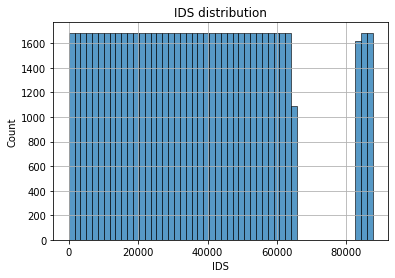

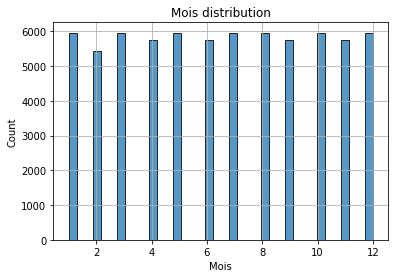

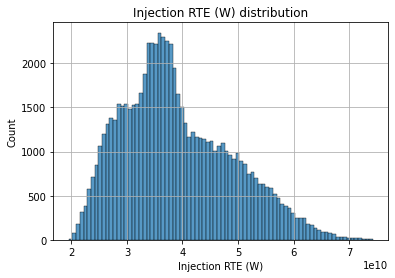

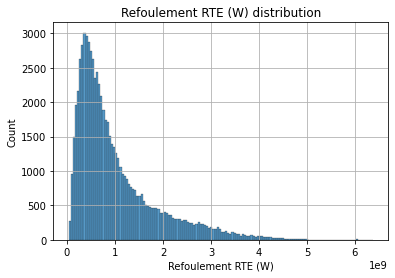

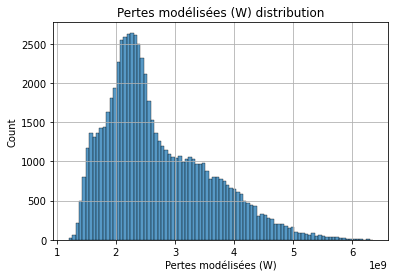

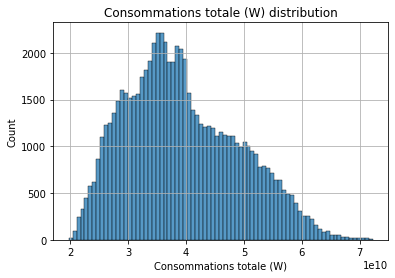

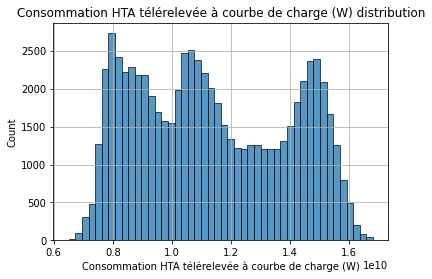

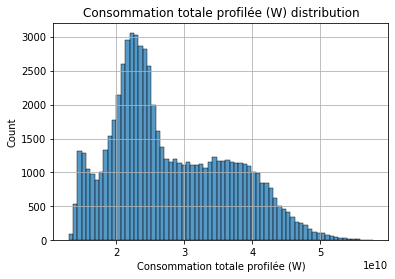

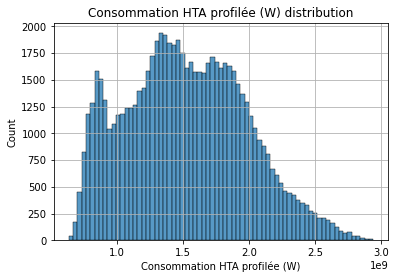

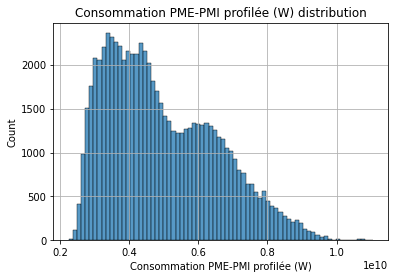

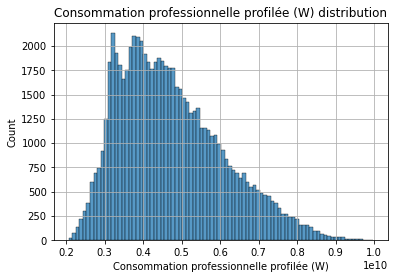

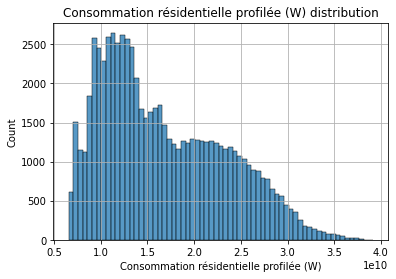

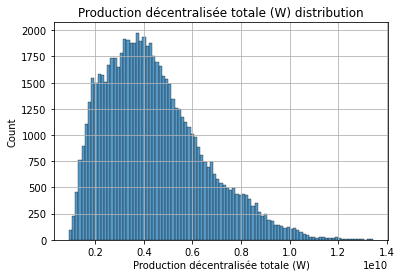

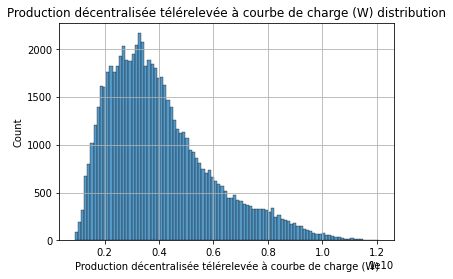

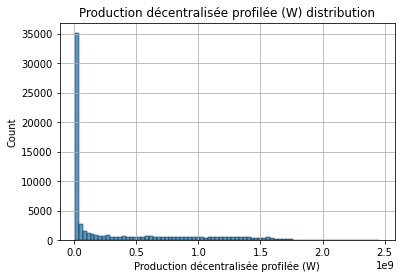

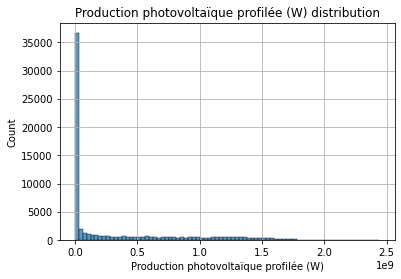

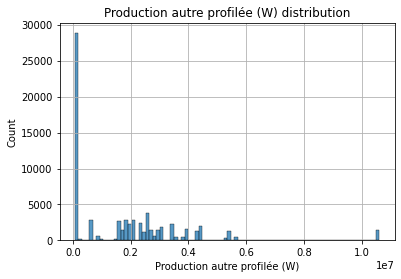

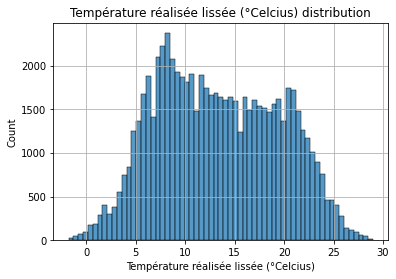

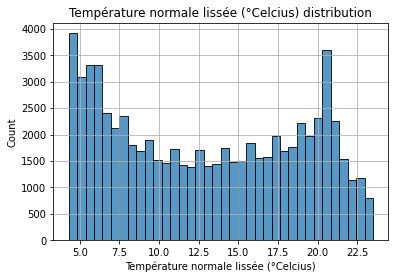

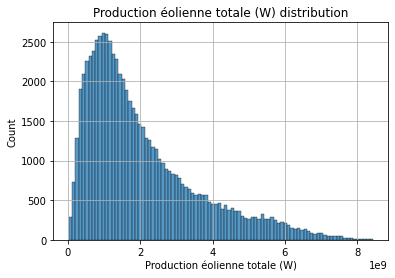

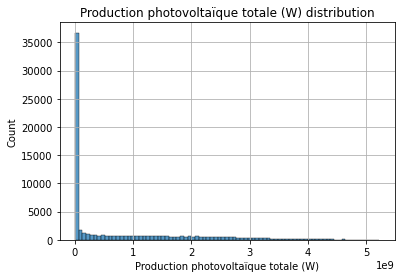

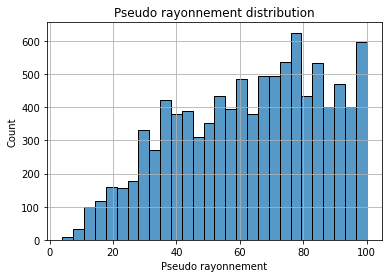

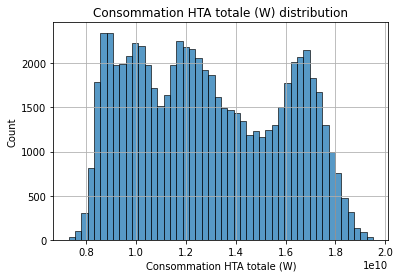

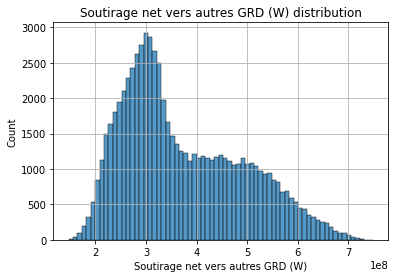

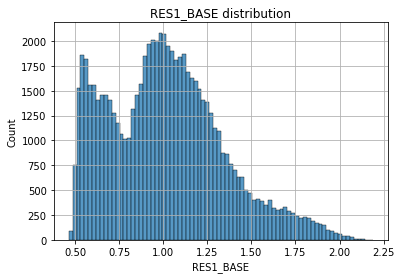

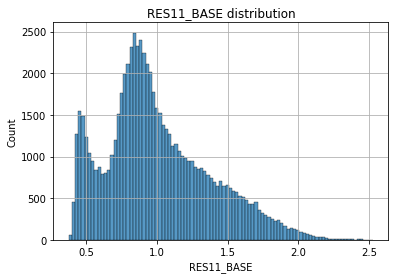

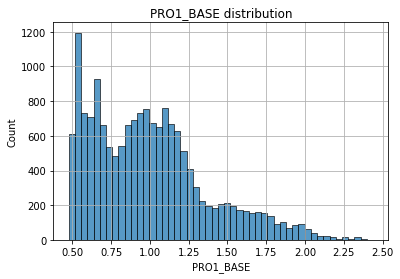

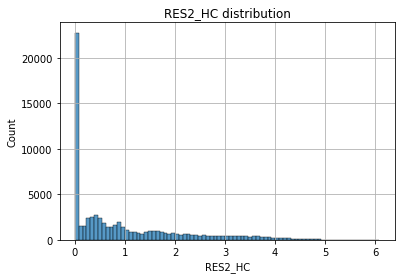

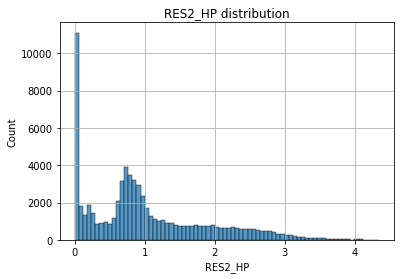

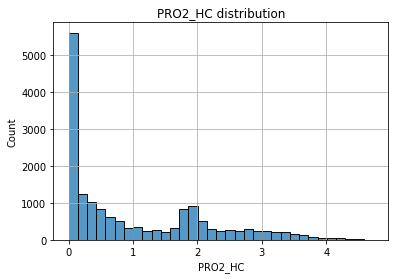

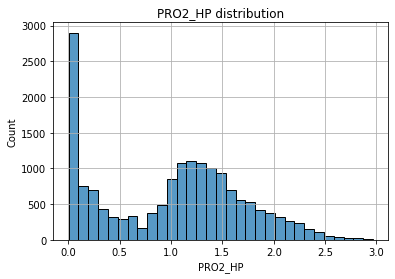

In [10]:
for col in df.select_dtypes(['int','float']):## tu peux aussi faire df.select_dtypes(exclude="object") par exemple
    plt.title(f"{col} distribution")
    sns.histplot(df[col])
    plt.grid()
    plt.show()

We can cleary see that some distrubution look the very same, namely (consommation totale de HTA and consommation totale de HTAtéléversé à la courbe de charge) or (production décentralisée totale et production décentralisée totale téléversée à la courbe de charge), (consommation PME-PMI profilée et consommation résidentielle profilée) to cite only them. 

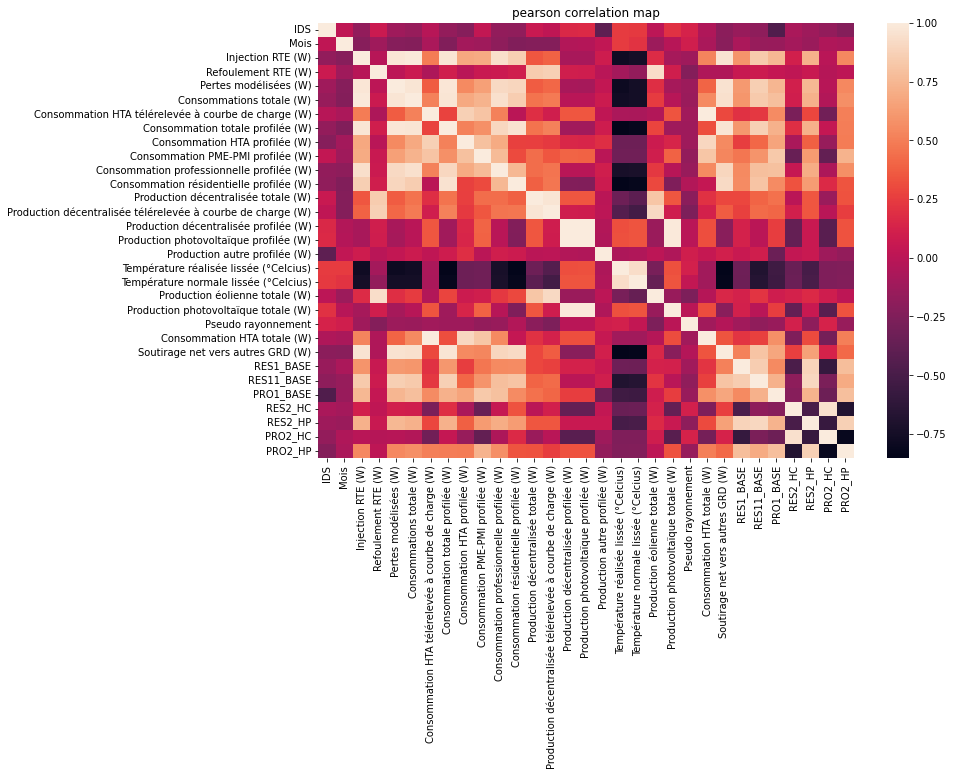

In [17]:
plt.figure(figsize=(12,8))
plt.title("Correlation map")
sns.heatmap(df.corr())
plt.show()

There is many things to say with this correlation map. 
* Pertes modélisées et Consommation totale are strongly correlated which is normal
* Injection totale is strongly correlated with Pertes modélisées, Consommation totale, consommation totale profilée and more generally with every consumption variables, but also with soutirage net vers autres GRD and res11 base and pro1Base
* RES1_ et RES2_HP are the major contributor to total enery consumption. 
* Production totale éolienne et refoulement 
* As stunning as it is there is a strong negativ correlation <-0.75 between temperature and total consumption. 
* Production décentralisée and production photovoltaïque are strongly correlated almost 1. 
* RES2_HP seems to be correleted with RES1_BASE and RES11_BASE
* RES2_HC and RES2_PRO strongly correlated.

Can be augmented.

We have to keep those classes apart RES1_BASE, PRO1_BASE, RES2_HP, PRO2_HP : each of those contain a value which correspond to the consumption I supposed. 

In [19]:
print(df.loc[0])

IDS                                                                                    1
Horodate_UTC                                                            13/10/2013 22:00
Horodate                                                       2013-10-13T00:00:00+02:00
Mois                                                                                  10
Injection RTE (W)                                                            39784230000
Refoulement RTE (W)                                                            103415000
Pertes modélisées (W)                                                         2849582877
Consommations totale (W)                                                     37576289504
Consommation HTA télérelevée à courbe de charge (W)                           8062590100
Consommation totale profilée (W)                                             29513699404
Consommation HTA profilée (W)                                                 1009515939
Consommation PME-PMI 